In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from shutil import copyfile
from os import path, listdir, mkdir
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras import optimizers, Sequential
from keras.callbacks import History
history = History()

In [3]:
#with ZipFile('car_ims.zip', 'r') as zip:
#    print('Extracting files')
#    zip.extractall("./cars/images")
#    print('Done')

In [4]:
class_mapping = pd.read_csv('car_mapping_stanford.csv')
car_mapping = pd.read_csv('class_mapping_stanford.csv')

In [5]:
class_mapping.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,fname
0,car_ims/000001.jpg,112,7,853,717,1,0
1,car_ims/000002.jpg,48,24,441,202,1,0
2,car_ims/000003.jpg,7,4,277,180,1,0
3,car_ims/000004.jpg,33,50,197,150,1,0
4,car_ims/000005.jpg,5,8,83,58,1,0


In [6]:
car_mapping.head()

,cars,id
0,AM General Hummer SUV 2000,0
1,Acura RL Sedan 2012,1
2,Acura TL Sedan 2012,2
3,Acura TL Type-S 2008,3
4,Acura TSX Sedan 2012,4


In [7]:
class_mapping.columns = ['fname','bbox_x1','bbox_y1','bbox_x2','bbox_y2','id','test']
class_mapping = class_mapping.drop('test', axis='columns')
class_mapping.head()

,fname,bbox_x1,bbox_y1,bbox_x2,bbox_y2,id
0,car_ims/000001.jpg,112,7,853,717,1
1,car_ims/000002.jpg,48,24,441,202,1
2,car_ims/000003.jpg,7,4,277,180,1
3,car_ims/000004.jpg,33,50,197,150,1
4,car_ims/000005.jpg,5,8,83,58,1


In [8]:
mapping = class_mapping.merge(car_mapping, on='id')
mapping.head()

,fname,bbox_x1,bbox_y1,bbox_x2,bbox_y2,id,cars
0,car_ims/000001.jpg,112,7,853,717,1,Acura RL Sedan 2012
1,car_ims/000002.jpg,48,24,441,202,1,Acura RL Sedan 2012
2,car_ims/000003.jpg,7,4,277,180,1,Acura RL Sedan 2012
3,car_ims/000004.jpg,33,50,197,150,1,Acura RL Sedan 2012
4,car_ims/000005.jpg,5,8,83,58,1,Acura RL Sedan 2012


In [9]:
#mapping['id'] = mapping['id'].astype('str')
mapping.head()

,fname,bbox_x1,bbox_y1,bbox_x2,bbox_y2,id,cars
0,car_ims/000001.jpg,112,7,853,717,1,Acura RL Sedan 2012
1,car_ims/000002.jpg,48,24,441,202,1,Acura RL Sedan 2012
2,car_ims/000003.jpg,7,4,277,180,1,Acura RL Sedan 2012
3,car_ims/000004.jpg,33,50,197,150,1,Acura RL Sedan 2012
4,car_ims/000005.jpg,5,8,83,58,1,Acura RL Sedan 2012


In [10]:
mapping['fname'] = mapping['fname'].str.split('/').str[-1]
mapping.head()

,fname,bbox_x1,bbox_y1,bbox_x2,bbox_y2,id,cars
0,000001.jpg,112,7,853,717,1,Acura RL Sedan 2012
1,000002.jpg,48,24,441,202,1,Acura RL Sedan 2012
2,000003.jpg,7,4,277,180,1,Acura RL Sedan 2012
3,000004.jpg,33,50,197,150,1,Acura RL Sedan 2012
4,000005.jpg,5,8,83,58,1,Acura RL Sedan 2012


In [11]:
mapping['cars'].unique

<bound method Series.unique of 0                  Acura RL Sedan 2012
1                  Acura RL Sedan 2012
2                  Acura RL Sedan 2012
3                  Acura RL Sedan 2012
4                  Acura RL Sedan 2012
                     ...              
16100    smart fortwo Convertible 2012
16101    smart fortwo Convertible 2012
16102    smart fortwo Convertible 2012
16103    smart fortwo Convertible 2012
16104    smart fortwo Convertible 2012
Name: cars, Length: 16105, dtype: object>

In [12]:
train, test = train_test_split(mapping, test_size=0.3, stratify=mapping['id'])
train.head()

,fname,bbox_x1,bbox_y1,bbox_x2,bbox_y2,id,cars
8825,008826.jpg,19,38,259,181,108,Ford Expedition EL SUV 2009
13085,013086.jpg,4,50,800,404,160,Mercedes-Benz 300-Class Convertible 1993
13006,013007.jpg,1,6,500,240,159,McLaren MP4-12C Coupe 2012
11266,011267.jpg,239,210,1155,689,137,Hyundai Sonata Sedan 2012
3598,003599.jpg,6,50,300,167,45,Bugatti Veyron 16.4 Coupe 2009


In [13]:
image_dir = './cars/images/car_ims/'

train_proc_dir = './cars/images/train_proc/'
test_proc_dir = './cars/images/test_proc/'

#if not path.exists(train_proc_dir):
#    mkdir(train_proc_dir)

#if not path.exists(test_proc_dir):
#    mkdir(test_proc_dir)

#for fn in train.iterrows():
#        copyfile(image_dir+fn[1][0], train_proc_dir+fn[1][0])
#        image = Image.open(train_proc_dir+fn[1][0])
#        image = image.resize((96, 96), Image.ANTIALIAS)
#        image.save(train_proc_dir+fn[1][0])

#for fn in test.iterrows():
#        copyfile(image_dir+fn[1][0], test_proc_dir+fn[1][0])
#        image = Image.open(test_proc_dir+fn[1][0])
#        image = image.resize((96, 96), Image.ANTIALIAS)
#        image.save(test_proc_dir+fn[1][0])

In [14]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1/255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.4
)

train_generator = train_datagen.flow_from_dataframe(
    train, 
    train_proc_dir,
    x_col='fname',
    y_col='cars',
    class_mode='categorical',
    color_mode='rgb',
    batch_size=1,
    target_size=(96,96),
    subset = 'training'
)

val_generator = train_datagen.flow_from_dataframe(
        test,
        test_proc_dir,
        x_col='fname',
        y_col='cars',
        color_mode='rgb',
        batch_size=1,
        class_mode='categorical',
        target_size=(96,96),
        subset='validation'
)

Found 4782 validated image filenames belonging to 195 classes.
Found 611 validated image filenames belonging to 195 classes.


G:\Anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 3303 invalid image filename(s) in x_col="fname". These filename(s) will be ignored.
  warnings.warn(
G:\Anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 3303 invalid image filename(s) in x_col="fname". These filename(s) will be ignored.
  warnings.warn(


In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='valid',
                 input_shape=(96, 96, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss="binary_crossentropy", 
              metrics = ['accuracy'], 
              optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 92, 92, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        1

In [18]:
history = model.fit(train_generator, 
                    validation_data=val_generator, 
                    epochs=2, 
                    shuffle=True)

Epoch 1/2
4782/4782 [==============================] - 88s 18ms/step - loss: 0.0350 - accuracy: 0.9930 - val_loss: 0.0322 - val_accuracy: 0.9949
Epoch 2/2
4782/4782 [==============================] - 85s 18ms/step - loss: 0.0322 - accuracy: 0.9949 - val_loss: 0.0324 - val_accuracy: 0.9949


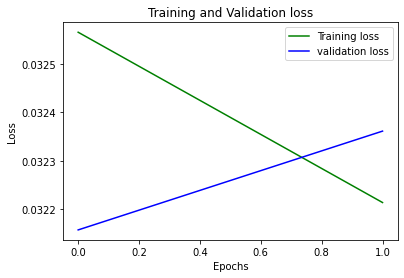

In [25]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,2)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

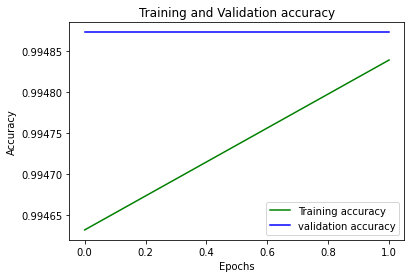

In [23]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,len(loss_train))
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()